In [275]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append('../')
import util
import dinuc_shuffle
import shutil
import pandas as pd
import pysam
import kipoiseq
import pybedtools
import numpy as np
import seaborn as sns
import upsetplot
import tensorflow as tf
import matplotlib_venn
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
fasta_extractor = util.FastaStringExtractor('../../genomes/hg38.fa')
regulon = pd.read_csv('/gstore/home/toneyans/regulon.csv')


In [214]:
gata6_df = regulon[regulon['tf'] == 'GATA6'][['chr', 'start', 'end']].reset_index(drop=True)
gata6_df = gata6_df.drop_duplicates()
gata6_df.to_csv('gata6.csv', sep='\t', header=None, index=None)

gata6 = pybedtools.BedTool.from_dataframe(gata6_df)

In [239]:
nkx_df = regulon[regulon['tf'] == 'NKX2-1'][['chr', 'start', 'end']].reset_index(drop=True)
nkx_df = nkx_df.drop_duplicates()
nkx_df.to_csv('nkx.csv', sep='\t', header=None, index=None)
nkx = pybedtools.BedTool.from_dataframe(nkx_df)

In [8]:
gata = pybedtools.BedTool('./gata6.csv')
nkx = pybedtools.BedTool('nkx.csv')
c1_path = '/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/C1_peaks.bed'
c3_path = '/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/C3_peaks.bed'
c1 = pybedtools.BedTool(c1_path)
c3 = pybedtools.BedTool(c3_path)


In [126]:
c1_df = util.read_bed(c1_path)
c3_df = util.read_bed(c3_path)
compl_c1 = util.read_bed('/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/compl_C1_peaks.bed')
compl_c3 = util.read_bed('/gstore/project/lineage/shush/CBP_Epiregulon/training_data/peaks/compl_C3_peaks.bed')

In [11]:
label_bed =  {'C1': c1_df, 'non-C1': compl_c1, 'C3': c3_df, 'non-C3': compl_c3}
for k, v in label_bed.items():

    _ = util.predict_rows_of(v, '../doubletRemoved_models/C1_chrombpnet_nobias.h5', 
                         fasta_extractor, L_input=2114, save_prefix=k, N_subset=10000)

File exists, skipping C1_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping non-C1_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping C3_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping non-C3_WT_model_C1_chrombpnet_nobias.pickle


In [12]:
label_bed =  {'C1': c1_df, 'non-C1': compl_c1, 'C3': c3_df, 'non-C3': compl_c3}
for k, v in label_bed.items():

    _ = util.predict_rows_of(v, '../doubletRemoved_models/C1_chrombpnet_nobias.h5', 
                         fasta_extractor, L_input=2114, save_prefix=k, N_subset=10000)

File exists, skipping C1_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping non-C1_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping C3_WT_model_C1_chrombpnet_nobias.pickle
File exists, skipping non-C3_WT_model_C1_chrombpnet_nobias.pickle


In [13]:
combined_results = []
for k in label_bed.keys():
    model_path = 'C1_chrombpnet_nobias'
    dict_path = f'{k}_WT_model_{model_path.split("/")[-1].split(".")[0]}.pickle'
    df = pd.DataFrame({'WT count': util.dict_load(dict_path)['wt_count']})
    df['region'] = k
    combined_results.append(df)
combined_results = pd.concat(combined_results)

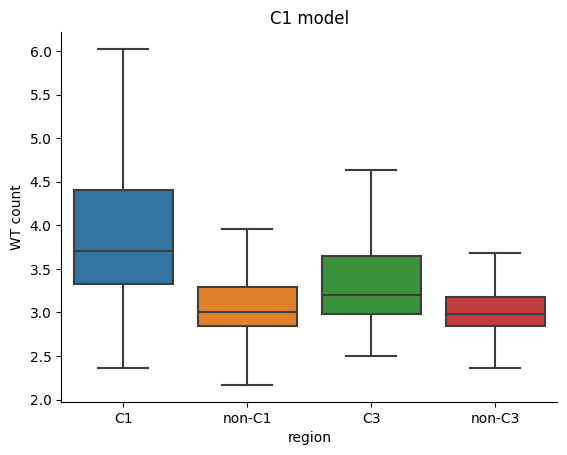

In [14]:
ax=sns.boxplot(data=combined_results, x='region', y='WT count', showfliers=False)
plt.title('C1 model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [15]:
label_bed =  {'C1': c1_df, 'non-C1': compl_c1, 'C3': c3_df, 'non-C3': compl_c3}
for k, v in label_bed.items():

    _ = util.predict_rows_of(v, '../doubletRemoved_models/C3_chrombpnet_nobias.h5', 
                         fasta_extractor, L_input=2114, save_prefix=k, N_subset=10000)

File exists, skipping C1_WT_model_C3_chrombpnet_nobias.pickle
File exists, skipping non-C1_WT_model_C3_chrombpnet_nobias.pickle
File exists, skipping C3_WT_model_C3_chrombpnet_nobias.pickle
File exists, skipping non-C3_WT_model_C3_chrombpnet_nobias.pickle


In [26]:
util.bw_to_pd(c1.intersect(c3))

,0,1,2,3,4,5,6,7,8,9
0,chr1,1375167,1375661,.,205.64900,*,205.64900,-1,-1,250
1,chr1,2227588,2228064,.,186.71700,*,186.71700,-1,-1,250
2,chr1,9910334,9910830,.,208.04200,*,208.04200,-1,-1,250
3,chr1,11262479,11262876,.,191.42400,*,191.42400,-1,-1,250
4,chr1,33036809,33037229,.,189.07100,*,189.07100,-1,-1,250
...,...,...,...,...,...,...,...,...,...,...
13114,chr5,34007090,34007538,.,1.39058,*,1.39058,-1,-1,250
13115,chr9,113712456,113712560,.,1.39058,*,1.39058,-1,-1,250
13116,chr15,63198105,63198488,.,1.39058,*,1.39058,-1,-1,250
13117,chr19,45002326,45002386,.,1.39058,*,1.39058,-1,-1,250


In [16]:
combined_results = []
for k in label_bed.keys():
    for model_path in ['C1_chrombpnet_nobias', 'C3_chrombpnet_nobias']: 
        dict_path = f'{k}_WT_model_{model_path.split("/")[-1].split(".")[0]}.pickle'
        df = pd.DataFrame({'WT count': util.dict_load(dict_path)['wt_count']})
        df['region'] = k
        df['model'] = model_path
        combined_results.append(df)
combined_results = pd.concat(combined_results)

<Axes: >

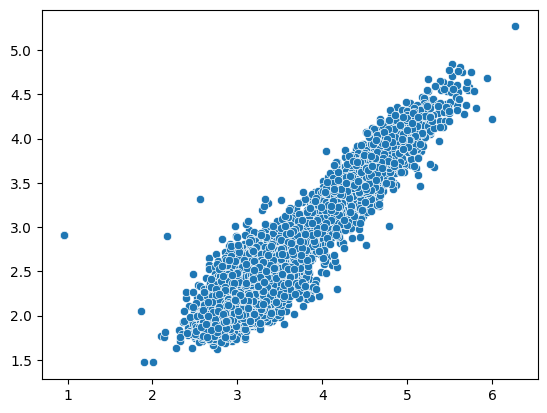

In [18]:
c1_preds = combined_results[combined_results['region']=='non-C1']
sns.scatterplot(x=c1_preds[c1_preds['model']=='C1_chrombpnet_nobias']['WT count'].values,
               y=c1_preds[c1_preds['model']=='C3_chrombpnet_nobias']['WT count'].values)

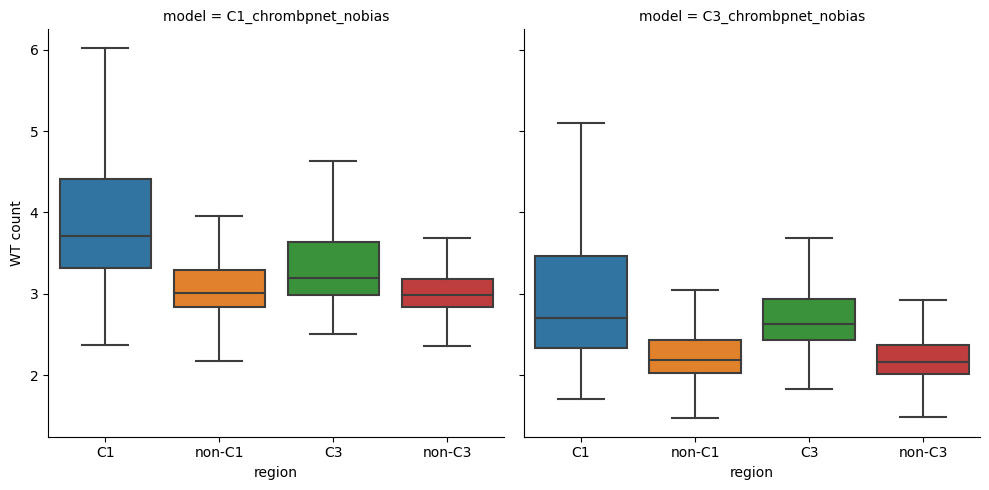

In [104]:
sns.catplot(data=combined_results, x='region', y='WT count', col='model', kind='box', showfliers=False)


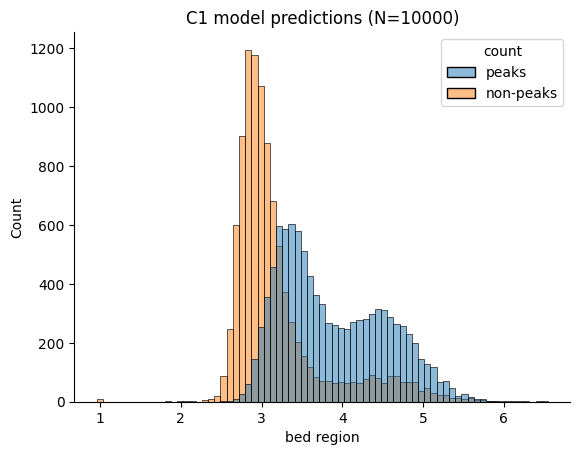

In [49]:
ax=sns.histplot(data=c1_peak_non_peak, x='bed region', hue='count')
# plt.legend()
plt.title('C1 model predictions (N=10000)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [103]:
util.write_bed(pd.read_table(pybedtools.BedTool.from_dataframe(gata_and_c1).intersect(nkx).fn, header=None), 'gatac1_nkx.csv')

In [104]:
util.write_bed(pd.read_table(pybedtools.BedTool.from_dataframe(gata_and_c1).intersect(nkx, v=True).fn, header=None), 'gatac1_no_nkx.csv')

In [8]:
label_list = []
value_list = []
bed_dict = {'GATA6': gata, 'NKX2-1': nkx, 'C1 peaks': c1}
for a, b in util.unique_combinations(bed_dict.keys(), 2):
    N_int = len(bed_dict[a].intersect(bed_dict[b]))
    N_a = len(bed_dict[a])
    N_b = len(bed_dict[b])
    for i, element in enumerate([[a], [b], [a, b]]):
        if element not in label_list:
            label_list.append(element)
            value_list.append([N_a, N_b, N_int][i])
            

In [ ]:
intersects = {}
intersects['gata_and_c1'] = util.intersect_beds(gata, c1)

In [20]:
len(intersects['gata_and_c1'])

2703

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

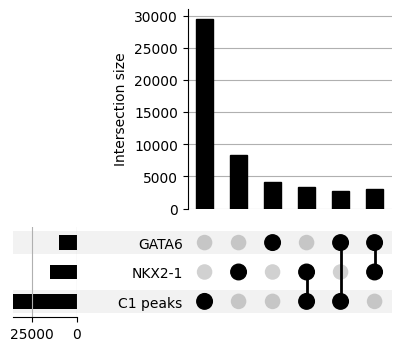

In [10]:
data = upsetplot.from_memberships(label_list, data=value_list)
upsetplot.plot(data)

In [22]:
gata_not_nkx = gata.intersect(c1).intersect(nkx, v=True)

In [34]:
len(gata)

4100

In [35]:
gata_c1 = gata.intersect(c1)
len(gata_c1)

2703

In [25]:
len(gata.intersect(c1).intersect(nkx))

2176

In [27]:
gata[1]

Interval(chr1:1375168-1375668)

In [28]:
gata_not_nkx[1]

Interval(chr1:7988538-7989038)

In [32]:
nkx[0]

Interval(chr1:817121-817621)

# C1 and C3 overlap

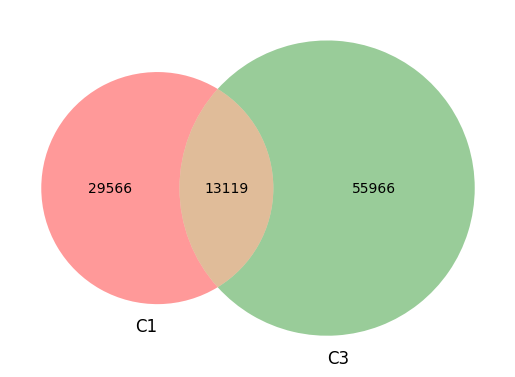

In [29]:
util.plot_bed_intersect([c1, c3], ['C1', 'C3'])

In [41]:
c1_c3_int = util.intersect_beds(c1, c3, wa=True)

In [58]:
c1_c3_int['class'] = 'C1 and C3'
c1_df['class'] = 'C1'

In [89]:
c1_c3_merge = c1_df.merge(c1_c3_int, on=[0,1,2], how='left').drop_duplicates()
np.random.seed(42)
c1_df_subset = c1_df.iloc[np.random.choice(list(c1_df.index), 10000, replace=False)]

c1_c3_merge = c1_df_subset.merge(c1_c3_merge, on=[0,1,2])

In [90]:
labels = []
for _, row in c1_c3_merge.iterrows():
    if pd.isnull(row['class_y']):
        labels.append('C1 only')
    else:
        labels.append('C1 and C3')

In [97]:
df = pd.DataFrame({'C1 model predictions': c1_preds[c1_preds['model']=='C1_chrombpnet_nobias']['WT count'].values, 
                  'C3 model predictions': c1_preds[c1_preds['model']=='C3_chrombpnet_nobias']['WT count'].values,
                  'region class': labels})

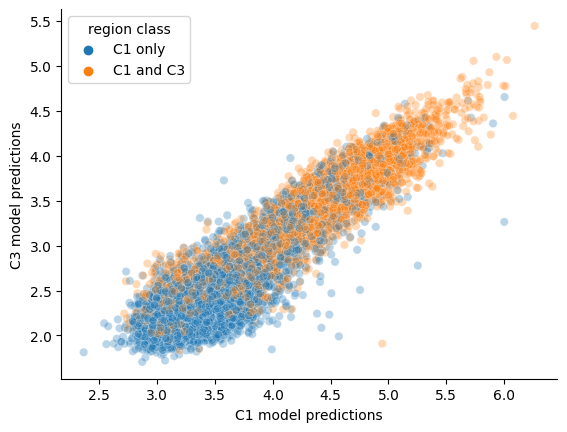

In [100]:


ax=sns.scatterplot(data=df, x='C1 model predictions', y='C3 model predictions', hue='region class',
               alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [127]:
c1_df['region class'] = 'C1'
c3_df['region class'] = 'C3'
c1_c3_int = util.intersect_beds(c1, c3, wa=True)
c1_c3_int['region class'] = 'C1 and C3'

In [135]:
c1_c3_merge = c1_df.merge(c1_c3_int, on=[0,1,2], how='outer').merge(c3_df, on=[0,1,2], how='outer')

In [145]:
c1_only = util.intersect_beds(c1, c3, v=True)
c3_only = util.intersect_beds(c3, c1, v=True)
c1_and_c3 = util.intersect_beds(c1, c3)

In [186]:
results_both_models = []
model_prefixes = ['C1', 'C3']
for model_prefix in model_prefixes:
    results = []
    process_dfs = {'C1_only': c1_only, 'C3_only': c3_only, 'C1_and_C3': c1_and_c3}
    for label, df in process_dfs.items():
        result = util.predict_rows_of(df, f'../doubletRemoved_models/{model_prefix}_chrombpnet_nobias.h5', 
                         fasta_extractor, L_input=2114, save_prefix=label, N_subset=10000)
        result['region class'] = label
        results.append(result)
    results = pd.concat(results)
    results['model'] = model_prefix
    results_both_models.append(results)

File exists, skipping C1_only_WT_model_C1_chrombpnet_nobias.csv
File exists, skipping C3_only_WT_model_C1_chrombpnet_nobias.csv
File exists, skipping C1_and_C3_WT_model_C1_chrombpnet_nobias.csv
File exists, skipping C1_only_WT_model_C3_chrombpnet_nobias.csv
File exists, skipping C3_only_WT_model_C3_chrombpnet_nobias.csv
File exists, skipping C1_and_C3_WT_model_C3_chrombpnet_nobias.csv


In [189]:
results_3_regions = results_both_models[0].merge(results_both_models[1], on=['0','1','2', 'region class'], suffixes=['_' + m  for m in model_prefixes])


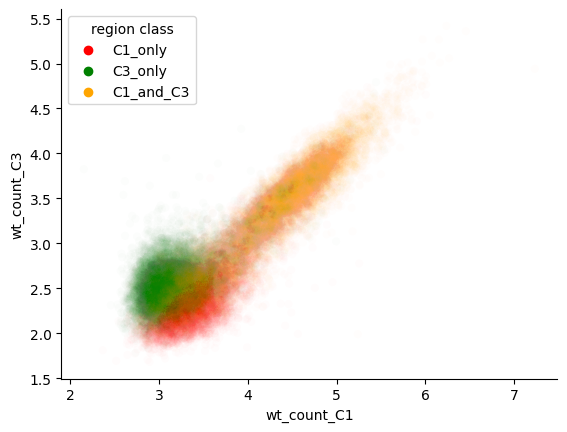

/local/10661726/ipykernel_23910/3605295583.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=results_3_regions[results_3_regions['region class']!='C1_and_C3'], x='wt_count_C1', y='wt_count_C3', hue='region class', alpha=0.01, palette=['red', 'green', 'orange'])


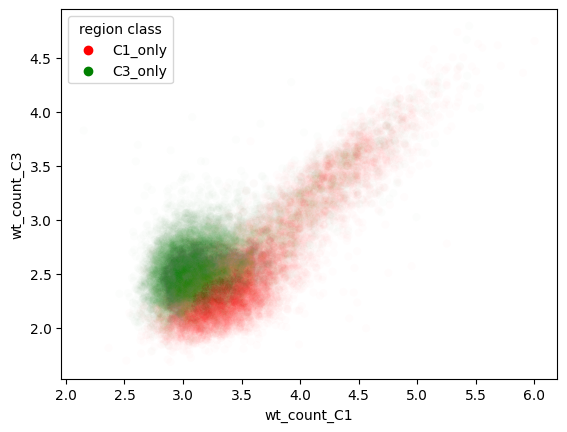

In [208]:
ax=sns.scatterplot(data=results_3_regions, x='wt_count_C1', y='wt_count_C3', hue='region class', alpha=0.01, palette=['red', 'green', 'orange'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
ax=sns.scatterplot(data=results_3_regions[results_3_regions['region class']!='C1_and_C3'], x='wt_count_C1', y='wt_count_C3', hue='region class', alpha=0.01, palette=['red', 'green', 'orange'])


# GATA in C1 vs GATA in C3

In [235]:
gata_in_C1 = util.intersect_beds(gata6, pybedtools.BedTool.from_dataframe(c1_only))
len(gata_in_C1)

1222

In [234]:
len(util.intersect_beds(gata6, pybedtools.BedTool.from_dataframe(c1_c3_int)))

1006

In [236]:
gata_in_C3 = util.intersect_beds(gata6, pybedtools.BedTool.from_dataframe(c3_only))
gata_in_C3.shape

(535, 3)

In [242]:
nkx_in_C1 = util.intersect_beds(nkx, pybedtools.BedTool.from_dataframe(c1_only))
nkx_in_C3 = util.intersect_beds(nkx, pybedtools.BedTool.from_dataframe(c3_only))


In [243]:
nkx_in_C3.shape

(2531, 3)

In [244]:
nkx_df.shape

(6756, 3)

In [246]:
nkx_in_both = util.intersect_beds(nkx, pybedtools.BedTool.from_dataframe(c1_c3_int))
nkx_in_both.shape

(1497, 3)

In [258]:
model_prefixes = ['C1', 'C3']

results = []

for model_prefix in model_prefixes:
    for label, df in {'GATA6_in_C1': gata_in_C1, 'NKX2-1_in_C3': nkx_in_C3}.items():
        result = util.predict_rows_of(df, f'../doubletRemoved_models/{model_prefix}_chrombpnet_nobias.h5', 
                             fasta_extractor, L_input=2114, save_prefix=label)
        result['region class'] = label
        result['model'] = model_prefix
        results.append(result)
results = pd.concat(results)

File exists, skipping GATA6_in_C1_WT_model_C1_chrombpnet_nobias.csv
File exists, skipping NKX2-1_in_C3_WT_model_C1_chrombpnet_nobias.csv
N rows = 1222


1222it [00:22, 53.73it/s]


N rows = 2531


2531it [00:26, 93.95it/s] 


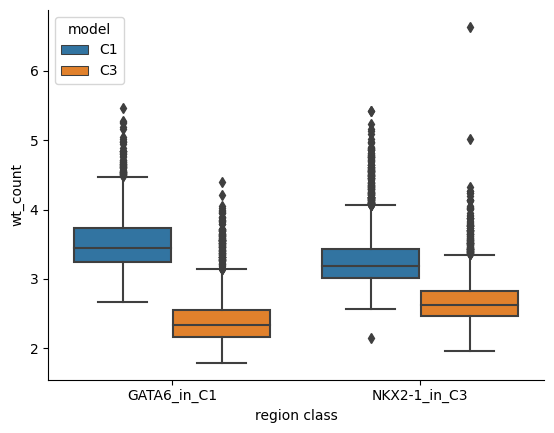

In [260]:
ax=sns.boxplot(data=results, y='wt_count', x='region class', hue='model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [253]:
results['region class'].unique()

array(['GATA6_in_C1', 'NKX2-1_in_C3'], dtype=object)

In [262]:
c1_motifs = util.read_bed('../motifs_in_peaks/C1_Motifs.bed')

In [265]:
[m for m in c1_motifs[3].unique() if 'GATA' in m]

['GATA3.Zf..DR4_103',
 'GATA3.Zf..DR8_104',
 'GATA.Zf..IR3_105',
 'GATA.Zf..IR4_106',
 'GATA3.Zf_107',
 'GATA.SCL.Zf.bHLH_111']

In [276]:
model = tf.keras.models.load_model('../doubletRemoved_models/C1_chrombpnet_nobias.h5', custom_objects={"multinomial_nll": util.multinomial_nll})

In [331]:
# collect all gata motifs in C1
c1_motifs = util.read_bed('../motifs_in_peaks/C1_Motifs.bed')
c3_motifs = util.read_bed('../motifs_in_peaks/C3_Motifs.bed')

c1_gata_motifs = c1_motifs[[True if 'GATA' in m else False 
                           for m in c1_motifs[3]]]


In [357]:
c3_motifs[1] = c3_motifs[1].astype(int)

In [358]:
# util.perturb_seqs(c1_gata_motifs, '../doubletRemoved_models/C1_chrombpnet_nobias.h5', fasta_extractor, L_input, 'motifs_in_C1_peaks_GATA' )

c3_nkx_motifs = c3_motifs[[True if 'Nkx2.1' in m else False 
                           for m in c3_motifs[3]]]

util.perturb_seqs(c3_nkx_motifs, '../doubletRemoved_models/C1_chrombpnet_nobias.h5', fasta_extractor, L_input, 'motifs_in_C3_peaks_Nkx' )


      0        1        2                    3  4  5
0  chr1   858937   858947  Nkx2.1.Homeobox_182  .  +
1  chr1   859002   859012  Nkx2.1.Homeobox_182  .  -
2  chr1  1612099  1612109  Nkx2.1.Homeobox_182  .  -
3  chr1  1612262  1612272  Nkx2.1.Homeobox_182  .  -
4  chr1  1693231  1693241  Nkx2.1.Homeobox_182  .  +


6247it [09:21, 11.13it/s]


,0,1,2,3,4,5,WT,negative_control,test
0,chr1,858937,858947,Nkx2.1.Homeobox_182,.,+,3.245799,3.418925,3.255421
1,chr1,859002,859012,Nkx2.1.Homeobox_182,.,-,3.193023,3.326845,3.191709
2,chr1,1612099,1612109,Nkx2.1.Homeobox_182,.,-,2.852364,3.397824,2.872086
3,chr1,1612262,1612272,Nkx2.1.Homeobox_182,.,-,2.766795,3.465055,2.790282
4,chr1,1693231,1693241,Nkx2.1.Homeobox_182,.,+,5.439391,4.798383,5.430608
...,...,...,...,...,...,...,...,...,...
6242,chrX,150617808,150617818,Nkx2.1.Homeobox_182,.,-,3.038316,3.172355,3.071207
6243,chrX,150840917,150840927,Nkx2.1.Homeobox_182,.,-,2.752234,3.115884,2.765067
6244,chrX,150842629,150842639,Nkx2.1.Homeobox_182,.,-,3.053183,3.318675,3.028970
6245,chrX,154378195,154378205,Nkx2.1.Homeobox_182,.,-,4.153616,4.308926,4.188159


In [359]:
gata_c1 = pd.read_csv('motifs_in_C1_peaks_GATA_10_model_C1_chrombpnet_nobias_shuffle_motif.csv')
nkx_c3 = pd.read_csv('motifs_in_C3_peaks_Nkx_10_model_C1_chrombpnet_nobias_shuffle_motif.csv')
nkx_c3['fold change'] = nkx_c3['test'] / nkx_c3['WT']
nkx_c3['motif'] = 'NKX'
gata_c1['fold change'] = gata_c1['test'] / gata_c1['WT']
gata_c1['motif'] = 'GATA'

In [371]:
gata_nkx_perturb = pd.concat([nkx_c3[['fold change', 'motif']], gata_c1[['fold change', 'motif']]])

<Axes: xlabel='fold change', ylabel='Count'>

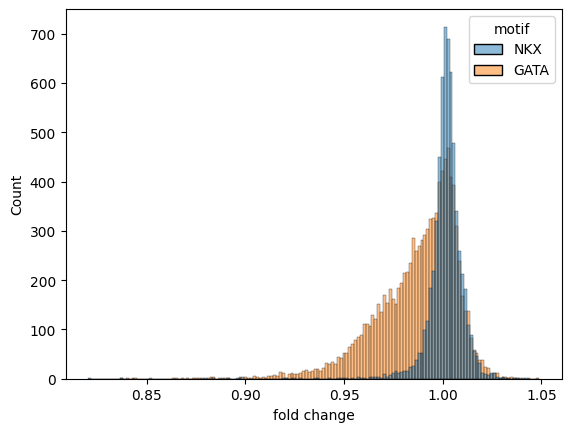

In [372]:
sns.histplot(data=gata_nkx_perturb, x='fold change', hue='motif')


In [373]:
util.perturb_seqs(c3_nkx_motifs, '../doubletRemoved_models/C3_chrombpnet_nobias.h5', fasta_extractor, L_input, 'motifs_in_C3_peaks_Nkx' )
util.perturb_seqs(c1_gata_motifs, '../doubletRemoved_models/C3_chrombpnet_nobias.h5', fasta_extractor, L_input, 'motifs_in_C1_peaks_GATA' );


      0        1        2                    3  4  5
0  chr1   858937   858947  Nkx2.1.Homeobox_182  .  +
1  chr1   859002   859012  Nkx2.1.Homeobox_182  .  -
2  chr1  1612099  1612109  Nkx2.1.Homeobox_182  .  -
3  chr1  1612262  1612272  Nkx2.1.Homeobox_182  .  -
4  chr1  1693231  1693241  Nkx2.1.Homeobox_182  .  +


6247it [08:47, 11.84it/s]


      0        1        2                  3  4  5
0  chr1  1847204  1847219  GATA3.Zf..DR4_103  .  -
1  chr1  6058643  6058658  GATA3.Zf..DR4_103  .  -
2  chr1  6158025  6158040  GATA3.Zf..DR4_103  .  -
3  chr1  7549599  7549614  GATA3.Zf..DR4_103  .  -
4  chr1  7975619  7975634  GATA3.Zf..DR4_103  .  +


10288it [15:15, 11.23it/s]


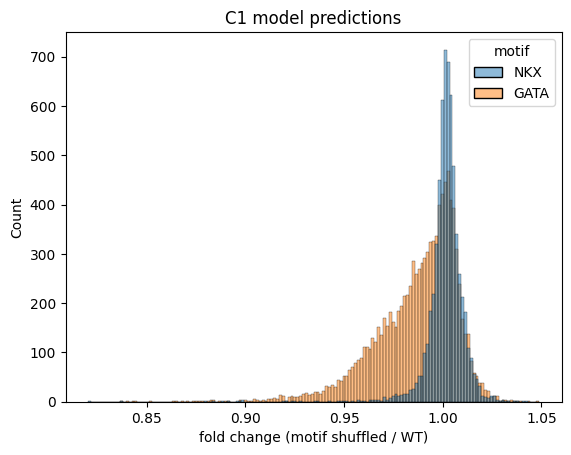

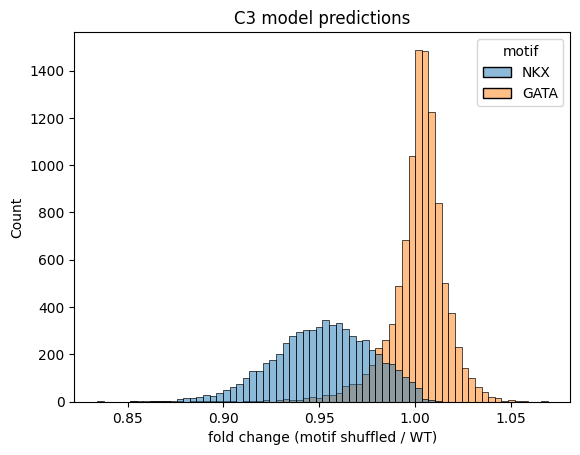

In [382]:
for model_suffix in ['C1', 'C3']:
    fold_change_col = 'fold change (motif shuffled / WT)'
    gata_c1 = pd.read_csv(f'motifs_in_C1_peaks_GATA_10_model_{model_suffix}_chrombpnet_nobias_shuffle_motif.csv')
    nkx_c3 = pd.read_csv(f'motifs_in_C3_peaks_Nkx_10_model_{model_suffix}_chrombpnet_nobias_shuffle_motif.csv')
    nkx_c3[fold_change_col] = nkx_c3['test'] / nkx_c3['WT']
    nkx_c3['motif'] = 'NKX'
    gata_c1[fold_change_col] = gata_c1['test'] / gata_c1['WT']
    gata_c1['motif'] = 'GATA'

    gata_nkx_perturb = pd.concat([nkx_c3[[fold_change_col, 'motif']], gata_c1[[fold_change_col, 'motif']]])

    sns.histplot(data=gata_nkx_perturb, x=fold_change_col, hue='motif')
    plt.title(f'{model_suffix} model predictions')
    plt.show()

Text(0.5, 1.0, 'C3 model predictions')

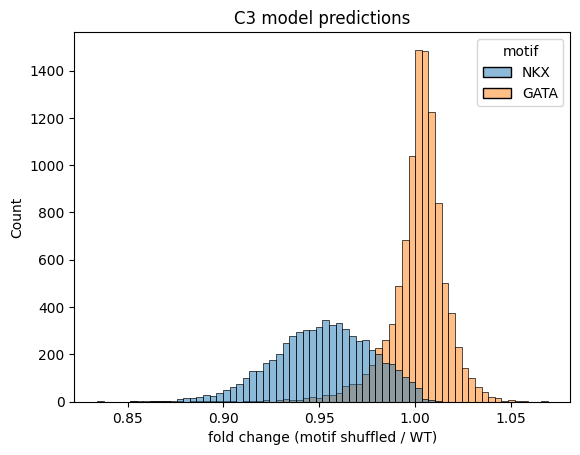